In [1]:
import numpy as np
import matplotlib.pyplot as plt

A simulation of the brown dwarf population in the solar neighborhood.  

In [2]:
from astropy.table import Table
from astropy.io import ascii

We wish to use the 2023 TRILEGAL group results on the star formation history of the solar neighborhood.
This includes the star formation rate in different slices above and below the plane midpoint (z=0).  

The Sun is considered to be at z= +17.7 in this model.

In [3]:
#read the age bins
agebins = ascii.read("GaiaHR2/logage_bins.dat") 

In [4]:
agebins['center']=10.0**((agebins['logage1']+agebins['logage2'])/2)
agebins['low']=10.0**agebins['logage1']
agebins['high']=10.0**agebins['logage2']
agebins['width']=10.0**(agebins['logage2'])-10.0**agebins['logage1']

In [5]:
agebins

logage1,logage2,center,low,high,width
float64,float64,float64,float64,float64,float64
6.6,7.1,7079457.843841373,3981071.7055349695,12589254.117941663,8608182.412406694
7.1,7.3,15848931.924611108,12589254.117941663,19952623.149688788,7363369.031747125
7.3,7.5,25118864.315095823,19952623.149688788,31622776.60168379,11670153.451995004
7.5,7.7,39810717.05534969,31622776.60168379,50118723.36272725,18495946.761043455
7.7,7.9,63095734.44801943,50118723.36272725,79432823.47242822,29314100.10970097
7.9,8.1,100000000.0,79432823.47242822,125892541.17941661,46459717.706988394
8.1,8.3,158489319.2461111,125892541.17941661,199526231.49688828,73633690.31747167
8.3,8.5,251188643.1509582,199526231.49688828,316227766.01683795,116701534.51994967
8.5,8.7,398107170.5534969,316227766.01683795,501187233.6272715,184959467.61043352


In [6]:
#original file was sfr_kpc3_corr.dat 
#small change to column names line is sfr_kpc3_corr_v2.dat 
sfrall=ascii.read("GaiaHR2/sfr_kpc3_corr_v2.dat")
#



In [7]:
sfrall

z1,z2,a1,sigma_a1_m,sigma_a1_p,a2,sigma_a2_m,sigma_a2_p,a3,sigma_a3_m,sigma_a3_p,a4,sigma_a4_m,sigma_a4_p,a5,sigma_a5_m,sigma_a5_p,a6,sigma_a6_m,sigma_a6_p,a7,sigma_a7_m,sigma_a7_p,a8,sigma_a8_m,sigma_a8_p,a9,sigma_a9_m,sigma_a9_p,a10,sigma_a10_m,sigma_a10_p,a11,sigma_a11_m,sigma_a11_p,a12,sigma_a12_m,sigma_a12_p,a13,sigma_a13_m,sigma_a13_p,a14,sigma_a14_m,sigma_a14_p,a15,sigma_a15_m,sigma_a15_p,a16,sigma_a16_m,sigma_a16_p
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
-1315.78,-1210.52,0.0002492003,5.883809e-05,4.558313e-05,0.0001964607,2.513509e-05,4.999112e-05,8.458075e-05,6.683857e-05,5.914301e-05,9.092277e-05,5.471989e-05,4.069984e-05,9.743519e-05,5.93178e-05,5.073419e-05,8.152442e-05,2.268867e-05,4.040389e-05,3.061234e-05,9.688656e-06,1.111507e-05,1.849753e-05,6.795482e-06,2.3881e-05,6.728194e-06,6.530037e-06,1.822182e-05,1.836423e-05,1.176109e-05,1.018527e-05,2.075717e-05,4.208824e-06,4.205464e-06,4.199486e-05,1.236849e-05,3.317419e-05,5.65458e-05,3.868462e-05,3.768115e-05,0.0001378482,3.701352e-05,3.123122e-05,0.000345142,5.220413e-05,5.18875e-05,0.0008783764,4.881891e-05,5.291151e-05
-1210.52,-1105.26,0.0002624811,8.986644e-05,0.0001097698,0.0001706075,5.210945e-05,7.440303e-05,8.641975e-05,2.686084e-05,9.485025e-05,9.03632e-05,2.061279e-05,7.848671e-05,5.131123e-05,2.527644e-05,4.737085e-05,3.719795e-05,1.040542e-05,2.886659e-05,3.18274e-05,1.692575e-05,3.113582e-05,3.92447e-05,1.888912e-05,5.129621e-05,1.298122e-05,3.680347e-06,5.320575e-06,3.003581e-05,1.294225e-05,2.797824e-05,2.273357e-05,6.497753e-06,2.799692e-05,4.516582e-05,9.489788e-06,1.38973e-05,9.77765e-05,4.457718e-05,3.097948e-05,9.717608e-05,3.059036e-05,7.856266e-05,0.0003866357,4.972048e-05,4.717307e-05,0.001048423,4.451991e-05,4.883709e-05
-1105.26,-1000.0,0.0001920147,0.0001115909,0.0001179851,0.0001542822,7.947892e-05,9.524207e-05,0.0001268424,7.49277e-05,8.631439e-05,3.404319e-05,1.26207e-05,3.412194e-05,5.143629e-05,1.580294e-05,2.909517e-05,4.435064e-05,1.241069e-05,1.996084e-05,3.366405e-05,2.701717e-05,3.797189e-05,2.190569e-05,1.604013e-05,1.654317e-05,2.032047e-05,8.623062e-06,3.462371e-05,3.904176e-05,1.339635e-05,1.526634e-05,4.950597e-05,2.205776e-05,2.624165e-05,4.737632e-05,1.897274e-05,2.609179e-05,9.995296e-05,4.118911e-05,3.484363e-05,0.0001381778,4.233268e-05,5.88542e-05,0.0004068482,4.30989e-05,4.63206e-05,0.001302476,5.724236e-05,5.386226e-05
-1000.0,-894.74,0.0002024832,0.0001679593,7.486317e-05,0.0002604736,0.0001252277,0.0001032998,0.0001790829,3.5606e-05,8.220143e-05,0.0001730372,8.980484e-05,8.306107e-05,9.442593e-05,7.01866e-05,8.759437e-05,5.897993e-05,2.004887e-05,4.508325e-05,4.718208e-05,9.024949e-06,1.963385e-05,2.277205e-05,8.061303e-06,3.068615e-05,2.443516e-05,9.752537e-06,2.124631e-05,3.389475e-05,1.464536e-05,1.272763e-05,8.837309e-05,2.292335e-05,3.149707e-05,7.295386e-05,2.346878e-05,3.104893e-05,0.0001575341,3.548819e-05,3.262488e-05,0.000253301,5.344173e-05,5.913618e-05,0.000683825,5.935604e-05,6.420258e-05,0.001410783,5.901528e-05,4.952857e-05
-894.74,-789.47,0.0002487041,8.465926e-05,8.089991e-05,0.000186472,8.691721e-05,9.6892e-05,0.0001936978,6.098312e-05,3.539536e-05,8.965999e-05,6.4805e-05,0.0001148613,8.716848e-05,4.026087e-05,4.724002e-05,0.0001058258,3.090746e-05,5.568598e-05,7.379767e-05,2.276045e-05,2.659638e-05,3.652882e-05,1.846795e-05,4.159488e-05,2.511412e-05,1.840433e-05,1.637865e-05,5.743893e-05,1.554248e-05,1.62092e-05,2.369037e-05,1.190512e-05,2.917514e-05,0.0001070178,1.682903e-05,2.747092e-05,0.000211772,6.032763e-05,4.088958e-05,0.0004997893,5.634838e-05,7.921164e-05,0.0008709653,6.507584e-05,6.461383e-05,0.00185601,6.131853e-05,6.366079e-05
-

In [8]:
#the sun is in the slice z1=0 to z2=52.63
isun=(sfrall['z1']==0)

In [9]:
sfrall[isun]

z1,z2,a1,sigma_a1_m,sigma_a1_p,a2,sigma_a2_m,sigma_a2_p,a3,sigma_a3_m,sigma_a3_p,a4,sigma_a4_m,sigma_a4_p,a5,sigma_a5_m,sigma_a5_p,a6,sigma_a6_m,sigma_a6_p,a7,sigma_a7_m,sigma_a7_p,a8,sigma_a8_m,sigma_a8_p,a9,sigma_a9_m,sigma_a9_p,a10,sigma_a10_m,sigma_a10_p,a11,sigma_a11_m,sigma_a11_p,a12,sigma_a12_m,sigma_a12_p,a13,sigma_a13_m,sigma_a13_p,a14,sigma_a14_m,sigma_a14_p,a15,sigma_a15_m,sigma_a15_p,a16,sigma_a16_m,sigma_a16_p
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.0,52.63,0.02657342,0.001968143,0.001895111,0.01338654,0.001115961,0.001223958,0.006999064,0.0005693089,0.000604584,0.00538703,0.0005205958,0.0004915665,0.006150761,0.0005159797,0.0005032291,0.005090872,0.0004569208,0.0005038919,0.005056791,0.000401576,0.0003659711,0.006559802,0.0003711978,0.0003566142,0.01499385,0.0006168399,0.0006608806,0.01650222,0.0005870919,0.0004946348,0.01679813,0.0005124447,0.0005155754,0.0147044,0.0003149044,0.0003214785,0.0163071,0.0003047443,0.0002762537,0.007476372,0.0002478776,0.0002529808,0.007885873,0.0002184259,0.0001813505,0.008438158,0.0001802742,0.0001789683


In [10]:
sfrall[isun]

z1,z2,a1,sigma_a1_m,sigma_a1_p,a2,sigma_a2_m,sigma_a2_p,a3,sigma_a3_m,sigma_a3_p,a4,sigma_a4_m,sigma_a4_p,a5,sigma_a5_m,sigma_a5_p,a6,sigma_a6_m,sigma_a6_p,a7,sigma_a7_m,sigma_a7_p,a8,sigma_a8_m,sigma_a8_p,a9,sigma_a9_m,sigma_a9_p,a10,sigma_a10_m,sigma_a10_p,a11,sigma_a11_m,sigma_a11_p,a12,sigma_a12_m,sigma_a12_p,a13,sigma_a13_m,sigma_a13_p,a14,sigma_a14_m,sigma_a14_p,a15,sigma_a15_m,sigma_a15_p,a16,sigma_a16_m,sigma_a16_p
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.0,52.63,0.02657342,0.001968143,0.001895111,0.01338654,0.001115961,0.001223958,0.006999064,0.0005693089,0.000604584,0.00538703,0.0005205958,0.0004915665,0.006150761,0.0005159797,0.0005032291,0.005090872,0.0004569208,0.0005038919,0.005056791,0.000401576,0.0003659711,0.006559802,0.0003711978,0.0003566142,0.01499385,0.0006168399,0.0006608806,0.01650222,0.0005870919,0.0004946348,0.01679813,0.0005124447,0.0005155754,0.0147044,0.0003149044,0.0003214785,0.0163071,0.0003047443,0.0002762537,0.007476372,0.0002478776,0.0002529808,0.007885873,0.0002184259,0.0001813505,0.008438158,0.0001802742,0.0001789683


In [11]:
#question: We get ages that up to 12 Gyr!!!

In [12]:
def make_ages(mysize,islice,agebins,sfrall):
    #generate ages for approximately mysize stars according to the SFR at the appropriate vertical slice (islice)
    #it's approximate because we are rounding off real numbers 
    new_ages=np.array([])
    #the arrays a1, a2, etc give star formation rate.  The number of stars would be the 
    #the sfr times the width of the bin
    agesum=0.0
    for this_i, this_width in enumerate(agebins['width']):
        cname='a{0}'.format(this_i+1)
        agesum += sfrall[cname][islice]*this_width
    #
    for this_i,this_age in enumerate(agebins['center']):
        #create the name a1, a2, etc for each age bin
        cname='a{0}'.format(this_i+1)
        #calculate the number of stars in this bin. Note that it is an integer! 
        this_number=np.round(mysize*sfrall[cname][islice]*agebins['width'][this_i]/agesum).astype(int)
        #now assign random ages within the bin
        new_ages=np.append(new_ages,np.random.uniform(low=agebins['low'][this_i],high=agebins['high'][this_i],size=this_number))
    actual_size=np.shape(new_ages)[0]
    return actual_size,new_ages

In [13]:
target_size=10000

In [14]:
sn_size,sn_ages = make_ages(target_size,isun,agebins,sfrall)

In [15]:
sn_size


10002

In [16]:
sn_ages

array([1.12572586e+07, 5.56659034e+06, 9.08272491e+06, ...,
       8.01384273e+09, 8.90287846e+09, 1.11786498e+10])

(array([1420., 1562., 1225.,  765.,  818.,  790.,  881.,  837.,  871.,
         833.]),
 array([4.08276780e+06, 1.26249841e+09, 2.52091405e+09, 3.77932970e+09,
        5.03774534e+09, 6.29616098e+09, 7.55457663e+09, 8.81299227e+09,
        1.00714079e+10, 1.13298236e+10, 1.25882392e+10]),
 <BarContainer object of 10 artists>)

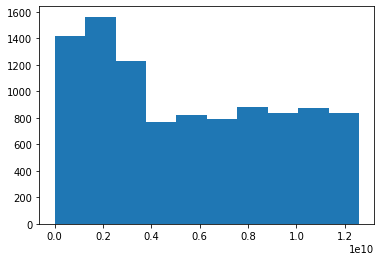

In [17]:
plt.hist(sn_ages)

In [18]:
#next let's take the slice at +1kpc (p1kpc), and then the slice at -1kpc (m1kpc)
i_p1kpc = (sfrall['z1']==1000.0)


In [19]:
p1kpc_size,p1kpc_ages = make_ages(target_size,i_p1kpc,agebins,sfrall)

(array([  59.,  158.,  281.,  287.,  949., 1037., 1620., 1886., 1880.,
        1844.]),
 array([6.80762011e+06, 1.26486216e+09, 2.52291670e+09, 3.78097125e+09,
        5.03902579e+09, 6.29708033e+09, 7.55513487e+09, 8.81318941e+09,
        1.00712440e+10, 1.13292985e+10, 1.25873530e+10]),
 <BarContainer object of 10 artists>)

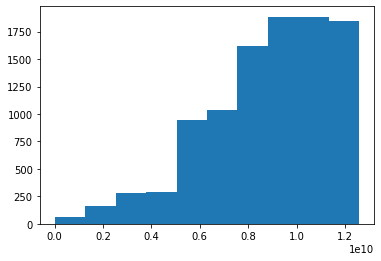

In [20]:
plt.hist(p1kpc_ages)

In [21]:
i_p1kpc

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False])

In [22]:
i_m1kpc = (sfrall['z1']== -1000.0)

In [23]:
i_m1kpc

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [24]:
m1kpc_size,m1kpc_ages = make_ages(target_size,i_m1kpc,agebins,sfrall)

(array([  82.,  145.,  285.,  346.,  938.,  896., 1654., 1889., 1894.,
        1873.]),
 array([6.02682689e+06, 1.26418066e+09, 2.52233449e+09, 3.78048833e+09,
        5.03864216e+09, 6.29679599e+09, 7.55494982e+09, 8.81310366e+09,
        1.00712575e+10, 1.13294113e+10, 1.25875652e+10]),
 <BarContainer object of 10 artists>)

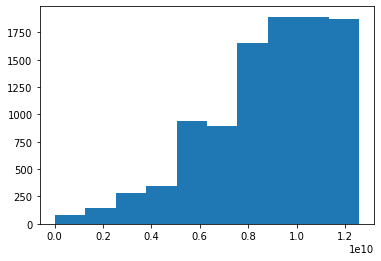

In [25]:
plt.hist(m1kpc_ages)

In [26]:
#Adopt a power-law mass function
#Kirkpatrick et al. claim best fit is dN/dM ~ M^-alpha with alpha =0.6 \pm 0.1

In [27]:
def mass_powerlaw(size,m0,m1,alpha):
    #dN/dM ~ M**(-alpha)
    factor1= (m1**(1-alpha)-m0**(1-alpha))
    factor2 = m0**(1-alpha)
    return (factor1*np.random.rand(size)+factor2)**(1/(1-alpha))

In [28]:
mass_minimum=0.003
mass_maximum=0.080

In [29]:
sn_masses=mass_powerlaw(sn_size,mass_minimum,mass_maximum,0.6)

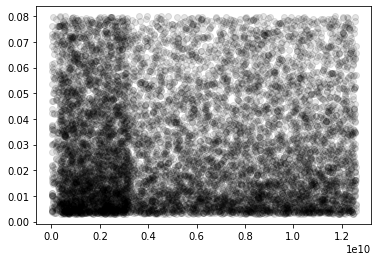

In [30]:
plt.plot(sn_ages,sn_masses,'ko',alpha=0.1)

In [31]:
p1kpc_masses=mass_powerlaw(p1kpc_size,mass_minimum,mass_maximum,0.6)
m1kpc_masses=mass_powerlaw(m1kpc_size,mass_minimum,mass_maximum,0.6)


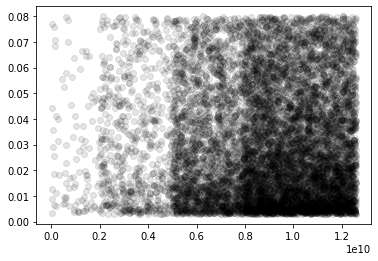

In [32]:
plt.plot(p1kpc_ages,p1kpc_masses,'ko',alpha=0.1)

In [33]:
#Dal Tio et al. 2021 2021MNRAS.506.5681D 
# age-metallicity relationship is:
# [fe/h]= alpha(t - 4.5 Gyr)
#alpha = -0.4 dex/Gyr
#
# again with sigma =0.1 at any given age
#
amr_slope = -0.4 / 12e9
amr_sigma = 0.1   #model assumes AMR dispersion of 0.1 

In [34]:
sn_feh = amr_slope * (sn_ages-4.5e9) + np.random.normal(loc=0.0,scale=amr_sigma,size=sn_size)
#this assigns metallicities to each object, though right now we don't do anything with them.

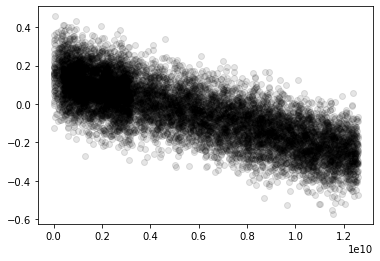

In [35]:
plt.plot(sn_ages,sn_feh,'ko',alpha=0.1)

In [36]:
p1kpc_feh = amr_slope * (p1kpc_ages-4.5e9) + np.random.normal(loc=0.0,scale=amr_sigma,size=p1kpc_size)
m1kpc_feh = amr_slope * (m1kpc_ages-4.5e9) + np.random.normal(loc=0.0,scale=amr_sigma,size=m1kpc_size)


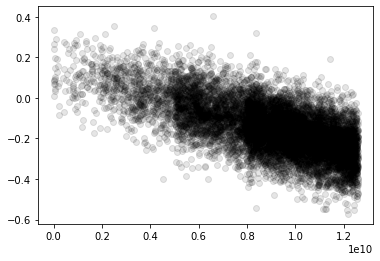

In [37]:
plt.plot(m1kpc_ages,m1kpc_feh,'ko',alpha=0.1)
#this distant sample is more metal-poor because it is older.

In [38]:
#now let's add some models and see what happens!
#first read Sonora Bobcat evolution models (solar metallicity, no clouds)
from astropy.io import ascii
bobcat = ascii.read("/Users/gizis/book/BrownDwarfBook/data/Sonora_Bobcat_nc+0.0_co1.0_mass.my.txt") 

from scipy.interpolate import LinearNDInterpolator


Bobcat_interp_Teff =  LinearNDInterpolator ((bobcat['M/Msun'],bobcat['age(Gyr)']),bobcat['Teff(K)'])

Bobcat_interp_Lum =  LinearNDInterpolator ((bobcat['M/Msun'],bobcat['age(Gyr)']),bobcat['log_L/Lsun'])

In [39]:
sn_teff=Bobcat_interp_Teff(sn_masses,sn_ages/1e9)
sn_lum=Bobcat_interp_Lum(sn_masses,sn_ages/1e9)

In [40]:
p1kpc_teff=Bobcat_interp_Teff(p1kpc_masses,p1kpc_ages/1e9)
p1kpc_lum=Bobcat_interp_Lum(p1kpc_masses,p1kpc_ages/1e9)
m1kpc_teff=Bobcat_interp_Teff(m1kpc_masses,m1kpc_ages/1e9)
m1kpc_lum=Bobcat_interp_Lum(m1kpc_masses,m1kpc_ages/1e9)

(array([1.173e+03, 1.257e+03, 1.310e+03, 1.019e+03, 8.530e+02, 7.220e+02,
        6.580e+02, 5.430e+02, 4.610e+02, 3.320e+02, 2.510e+02, 1.690e+02,
        1.300e+02, 9.900e+01, 8.200e+01, 7.200e+01, 6.400e+01, 5.000e+01,
        5.300e+01, 6.200e+01, 6.300e+01, 7.400e+01, 7.000e+01, 9.100e+01,
        9.400e+01, 8.200e+01, 1.110e+02, 4.800e+01, 1.000e+00, 3.000e+00]),
 array([ 134.36803599,  212.82197818,  291.27592036,  369.72986255,
         448.18380474,  526.63774693,  605.09168912,  683.54563131,
         761.9995735 ,  840.45351569,  918.90745788,  997.36140007,
        1075.81534226, 1154.26928445, 1232.72322664, 1311.17716883,
        1389.63111102, 1468.08505321, 1546.5389954 , 1624.99293759,
        1703.44687978, 1781.90082197, 1860.35476416, 1938.80870635,
        2017.26264854, 2095.71659073, 2174.17053292, 2252.62447511,
        2331.07841729, 2409.53235948, 2487.98630167]),
 <BarContainer object of 30 artists>)

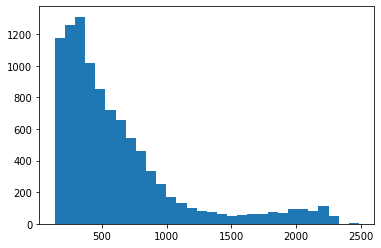

In [41]:
plt.hist(m1kpc_teff,bins=30)

(array([ 656., 1055., 1225.,  867.,  782.,  655.,  621.,  514.,  477.,
         398.,  293.,  256.,  245.,  202.,  167.,  138.,  150.,  117.,
         126.,  135.,  120.,  121.,   73.,  109.,  102.,  116.,  127.,
          63.,   19.,   17.]),
 array([ 134.88916282,  213.68674679,  292.48433075,  371.28191472,
         450.07949869,  528.87708265,  607.67466662,  686.47225059,
         765.26983455,  844.06741852,  922.86500249, 1001.66258645,
        1080.46017042, 1159.25775439, 1238.05533836, 1316.85292232,
        1395.65050629, 1474.44809026, 1553.24567422, 1632.04325819,
        1710.84084216, 1789.63842612, 1868.43601009, 1947.23359406,
        2026.03117802, 2104.82876199, 2183.62634596, 2262.42392992,
        2341.22151389, 2420.01909786, 2498.81668183]),
 <BarContainer object of 30 artists>)

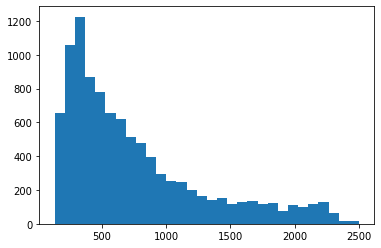

In [42]:
plt.hist(sn_teff,bins=30)

(array([   5.,   11.,   30.,  115.,  248.,  465.,  634.,  841.,  937.,
        1088., 1136., 1198., 1111.,  912.,  668.,  352.,  161.,   63.,
          22.,    5.]),
 array([-0.5733379 , -0.52178508, -0.47023225, -0.41867943, -0.3671266 ,
        -0.31557378, -0.26402095, -0.21246812, -0.1609153 , -0.10936247,
        -0.05780965, -0.00625682,  0.045296  ,  0.09684883,  0.14840165,
         0.19995448,  0.25150731,  0.30306013,  0.35461296,  0.40616578,
         0.45771861]),
 <BarContainer object of 20 artists>)

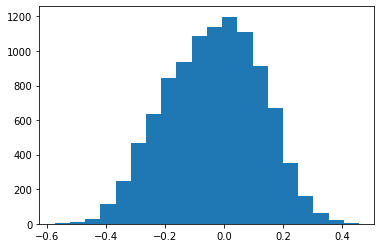

In [43]:
plt.hist(sn_feh,bins=20)

(array([   2.,    7.,   13.,   58.,  194.,  409.,  796., 1238., 1402.,
        1579., 1376., 1170.,  758.,  471.,  279.,  145.,   64.,   25.,
          11.,    4.]),
 array([-0.63780955, -0.58658496, -0.53536036, -0.48413577, -0.43291118,
        -0.38168659, -0.330462  , -0.27923741, -0.22801282, -0.17678823,
        -0.12556364, -0.07433905, -0.02311446,  0.02811013,  0.07933472,
         0.13055932,  0.18178391,  0.2330085 ,  0.28423309,  0.33545768,
         0.38668227]),
 <BarContainer object of 20 artists>)

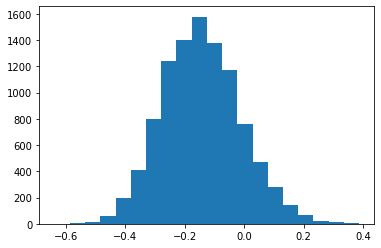

In [44]:
plt.hist(p1kpc_feh,bins=20)

In [45]:
np.average(sn_feh),np.median(sn_feh)

(-0.036172546958930386, -0.02901630532363402)

In [46]:
#Let us try Saumon & Marley 2009 "Hybrid" models
hybrid = ascii.read("hybrid_solar_age.txt") 
#caution: These do not include any ages above 10GYR!!!! 

In [47]:
Hybrid_interp_Teff =  LinearNDInterpolator ((hybrid['M/Msun'],hybrid['age(Gyr)']),hybrid['Teff(K)'])
Hybrid_interp_Lum =  LinearNDInterpolator ((hybrid['M/Msun'],hybrid['age(Gyr)']),hybrid['log_L/Lsun'])
#
# WARNING: THIS INTERPOLATOR will not extrapolate. Therefore all objects with ages >10 Gyr end up being dropped (NaN)

In [48]:
sn_teff_hybrid=Hybrid_interp_Teff(sn_masses,sn_ages/1e9)
sn_lum_hybrid=Hybrid_interp_Lum(sn_masses,sn_ages/1e9)

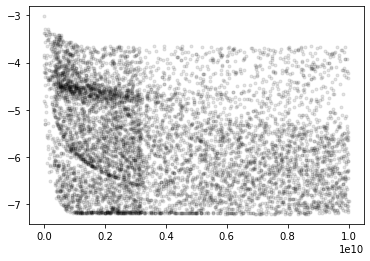

In [49]:
plt.plot(sn_ages,sn_lum_hybrid,'k.',alpha=0.1)

In [50]:
p1kpc_teff_hybrid=Hybrid_interp_Teff(p1kpc_masses,p1kpc_ages/1e9)
p1kpc_lum_hybrid=Hybrid_interp_Lum(p1kpc_masses,p1kpc_ages/1e9)
m1kpc_teff_hybrid=Hybrid_interp_Teff(m1kpc_masses,m1kpc_ages/1e9)
m1kpc_lum_hybrid=Hybrid_interp_Lum(m1kpc_masses,m1kpc_ages/1e9)

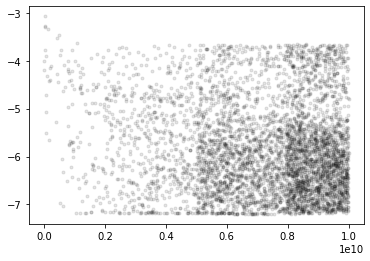

In [51]:
plt.plot(m1kpc_ages,m1kpc_lum_hybrid,'k.',alpha=0.1)

(array([1290.,  890.,  777.,  606.,  504.,  433.,  321.,  255.,  291.,
         474.,  309.,  179.,  151.,  150.,  130.,  102.,  130.,  128.,
          38.,   21.]),
 array([ 272.91830939,  380.59093959,  488.26356979,  595.93619999,
         703.60883019,  811.2814604 ,  918.9540906 , 1026.6267208 ,
        1134.299351  , 1241.9719812 , 1349.64461141, 1457.31724161,
        1564.98987181, 1672.66250201, 1780.33513221, 1888.00776242,
        1995.68039262, 2103.35302282, 2211.02565302, 2318.69828322,
        2426.37091342]),
 <BarContainer object of 20 artists>)

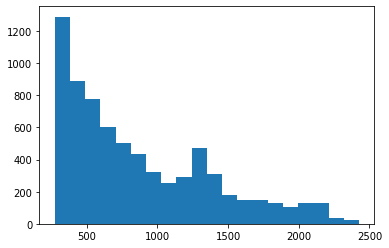

In [52]:
plt.hist(sn_teff_hybrid,bins=20)
#this will show us the peak at ~1300K that is predicted by the hybrid cooling model.

(array([925., 809., 630., 493., 382., 276., 215., 118., 119., 171., 113.,
         73.,  74.,  76.,  84.,  94.,  75.,  91.,   3.,   3.]),
 array([ 273.60142635,  381.55730931,  489.51319226,  597.46907522,
         705.42495818,  813.38084114,  921.33672409, 1029.29260705,
        1137.24849001, 1245.20437296, 1353.16025592, 1461.11613888,
        1569.07202184, 1677.02790479, 1784.98378775, 1892.93967071,
        2000.89555367, 2108.85143662, 2216.80731958, 2324.76320254,
        2432.71908549]),
 <BarContainer object of 20 artists>)

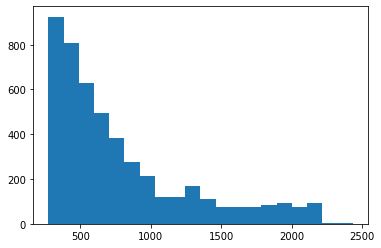

In [53]:
plt.hist(m1kpc_teff_hybrid,bins=20)